<a href="https://colab.research.google.com/github/poornasainehal1781/Python-DS/blob/main/Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

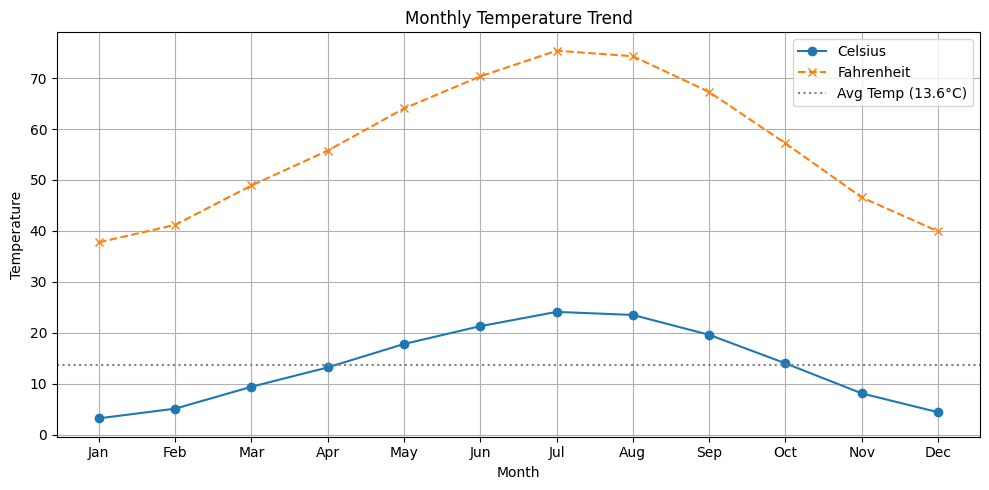

Monthly Temperatures (°C): [ 3.2  5.1  9.4 13.2 17.8 21.3 24.1 23.5 19.6 14.   8.1  4.4]
Average Temperature: 13.64 °C
Hottest Month: Jul (24.1 °C)
Coldest Month: Jan (3.2 °C)
Normalized Temperatures: [0.   0.09 0.3  0.48 0.7  0.87 1.   0.97 0.78 0.52 0.23 0.06]
Months above average temperature: May, Jun, Jul, Aug, Sep, Oct
Temperatures in Fahrenheit: [37.8 41.2 48.9 55.8 64.  70.3 75.4 74.3 67.3 57.2 46.6 39.9]


In [1]:
import numpy as np
import matplotlib.pyplot as plt


monthly_temps_c = np.array([3.2, 5.1, 9.4, 13.2, 17.8, 21.3, 24.1, 23.5, 19.6, 14.0, 8.1, 4.4])

avg_temp = np.mean(monthly_temps_c)

hottest_month_index = np.argmax(monthly_temps_c)
coldest_month_index = np.argmin(monthly_temps_c)

months = np.array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                   'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

normalized_temps = (monthly_temps_c - monthly_temps_c.min()) / (monthly_temps_c.max() - monthly_temps_c.min())

above_avg_indices = np.where(monthly_temps_c > avg_temp)[0]
above_avg_months = months[above_avg_indices]

monthly_temps_f = monthly_temps_c * 9/5 + 32

plt.figure(figsize=(10, 5))
plt.plot(months, monthly_temps_c, marker='o', label='Celsius')
plt.plot(months, monthly_temps_f, marker='x', linestyle='--', label='Fahrenheit')
plt.axhline(avg_temp, color='gray', linestyle=':', label=f'Avg Temp ({avg_temp:.1f}°C)')
plt.title("Monthly Temperature Trend")
plt.xlabel("Month")
plt.ylabel("Temperature")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
print("Monthly Temperatures (°C):", monthly_temps_c)
print(f"Average Temperature: {avg_temp:.2f} °C")
print(f"Hottest Month: {months[hottest_month_index]} ({monthly_temps_c[hottest_month_index]} °C)")
print(f"Coldest Month: {months[coldest_month_index]} ({monthly_temps_c[coldest_month_index]} °C)")
print("Normalized Temperatures:", normalized_temps.round(2))
print("Months above average temperature:", ", ".join(above_avg_months))
print("Temperatures in Fahrenheit:", monthly_temps_f.round(1))

In [2]:
import pandas as pd

data = {
    'Order ID': [1001, 1002, 1003, 1004, 1005, 1006],
    'Product': ['Laptop', 'Mouse', 'Monitor', 'Laptop', 'Keyboard', 'Mouse'],
    'Quantity': [1, 5, 2, 1, 10, 3],
    'Price': [1200, 25, 300, 1300, 45, 30]
}

df = pd.DataFrame(data)

df['Total Sale'] = df['Quantity'] * df['Price']

high_value_orders = df[df['Total Sale'] > 1000]

product_sales = df.groupby('Product')['Quantity'].sum().reset_index()
most_sold_product = product_sales.loc[product_sales['Quantity'].idxmax()]

df['Discount'] = df['Total Sale'].apply(lambda x: 0.10 * x if x > 1000 else 0)

with pd.ExcelWriter('sales_summary.xlsx') as writer:
    df.to_excel(writer, index=False, sheet_name='Full Data')
    high_value_orders.to_excel(writer, index=False, sheet_name='High Value Orders')
    product_sales.to_excel(writer, index=False, sheet_name='Product Sales')

print("Full Sales DataFrame:\n", df)
print("\nHigh Value Orders (>1000):\n", high_value_orders)
print("\nMost Sold Product:\n", most_sold_product)
print("\nSales summary exported to 'sales_summary.xlsx'")

Full Sales DataFrame:
    Order ID   Product  Quantity  Price  Total Sale  Discount
0      1001    Laptop         1   1200        1200     120.0
1      1002     Mouse         5     25         125       0.0
2      1003   Monitor         2    300         600       0.0
3      1004    Laptop         1   1300        1300     130.0
4      1005  Keyboard        10     45         450       0.0
5      1006     Mouse         3     30          90       0.0

High Value Orders (>1000):
    Order ID Product  Quantity  Price  Total Sale
0      1001  Laptop         1   1200        1200
3      1004  Laptop         1   1300        1300

Most Sold Product:
 Product     Keyboard
Quantity          10
Name: 0, dtype: object

Sales summary exported to 'sales_summary.xlsx'
